In [1]:
from openslide import OpenSlide, OpenSlideError

In [2]:
path = "/media/sf_E_DRIVE/data/media/images/POS5.1_10um_HE1_-_2015-11-04_13.41.32.ndpi"

In [3]:
osr = OpenSlide(path)

In [4]:
im_lr = osr.get_thumbnail((1024,1024))

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
levels = osr.level_dimensions
print levels

((182528, 70144), (91264, 35072), (45632, 17536), (22816, 8768), (11408, 4384), (5704, 2192), (2852, 1096), (1426, 548), (713, 274))


In [25]:
lowest_res = osr.read_region((0,0), len(levels)-2, levels[len(levels)-2])

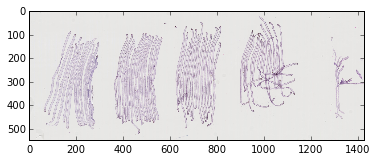

In [26]:
plt.figure()
plt.imshow(np.array(lowest_res), interpolation=None)
plt.show()

In [27]:
lowest_res_np = np.array(lowest_res)[:,:,:3]

In [28]:
from skimage import color, feature

(12104,) 3026.0


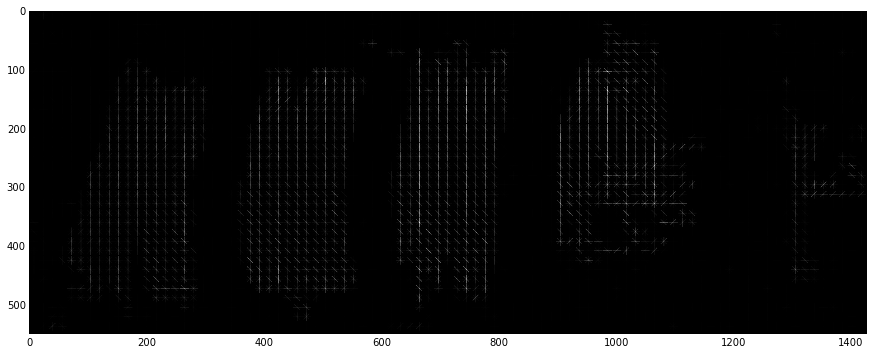

In [29]:
lr_gs = color.rgb2gray(lowest_res_np)
lr_hog, im_hog = feature.hog(lr_gs, 4, (16,16), (1,1), visualise=True)
print lr_hog.shape, lr_hog.shape[0]/4.
plt.figure(figsize=(15,15))
plt.gray()
plt.imshow(im_hog, interpolation=None)
plt.show()

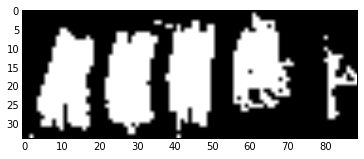

In [30]:
n_cells = lr_hog.shape[0]/4
shape_hog = (lr_gs.shape[0]/16, lr_gs.shape[1]/16)
im_tst = np.zeros((n_cells,))
for c in range(n_cells):
    h = lr_hog[c*4:(c+1)*4].sum() > 0.995
    im_tst[c] = h
plt.figure()
plt.imshow(im_tst.reshape(shape_hog))
plt.show()